In [134]:
import httplib2
import oauth2
import urllib3
import types
import re
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from gender_detector import GenderDetector 
import psycopg2, psycopg2.extras
from causalinference import CausalModel
from causalinference.utils import random_data
import httplib
import base64
import json # For Microsoft Face API
import urllib as urllib # For Microsoft Face API
import time 
import csv
import datetime 

# File names 
log_file_name = 'log_upwork_data_analysis_2017_11_21_worldwide_allskills.txt'
all_data_file_name = '11_21_2017_upwork_analysis_worldwide_allskills.csv'
gender_data_file_name = '11_20_2017_upwork_gender_analysis_worldwide_allskills.csv'

# Write a log
log = open(log_file_name, 'a')
log.write("We have started analyzing data!" + "\n")
log.flush()

# Initialize arrays for Causal Analysis 
user_count = 1
bill_rate_array = []
gender_array = []
all_covariates_array = []

# Read data from csv files and reformat
df = pd.read_csv(all_data_file_name)
df_gender = pd.read_csv(gender_data_file_name)

# Merge the files, then remove rows with an error, no gender identified, or ambiguous education
merged = df.merge(df_gender, on='user_count')
merged = merged[merged.bill_rate != 'error']
merged = merged[merged.gender != 'unidentified']
merged = merged[merged.education != 'None']

all_bill_rates = merged.bill_rate.astype('float')
merged['bill_rate'] = merged.bill_rate.astype('float')
all_work_experience = merged.work_experience
all_education = merged.education
all_job_category_id = merged.job_category_id
all_country_id = merged.country_id
all_genders = merged.gender
        
        
# Data formatting 
for gender in all_genders:
    if (gender == "female"):
        gender_array.append(1)
    elif (gender == "male"):
        gender_array.append(2)
    else:
        gender_array.append(0)

for rate in all_bill_rates:
    rate = round(float(rate), 2)
    bill_rate_array.append(rate)

for row in merged.itertuples():
    if (row.education != "None" and row.education != "error"): # Remove users for which we don't know education, or for which there were errors 
        covariate_matrix = [row.work_experience, row.education_id, row.country_id, row.job_category_id]
        all_covariates_array.append(covariate_matrix)
    else:
        covariate_matrix = [None] # For users we don't know education of, add empty covariate matrix
        all_covariates_array.append(covariate_matrix)

# Check that arrays contain complete data
print "Bill rate array length: {0}".format(len(bill_rate_array))
print "Gender array length: {0}".format(len(gender_array))
print "Covariate array length: {0}".format(len(all_covariates_array))


Bill rate array length: 7364
Gender array length: 7364
Covariate array length: 7364


In [135]:
print np.mean(bill_rate_array)

23.8281558935


In [136]:
print all_bill_rates.std()

25.2129165463


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8744c1fe50>]], dtype=object)

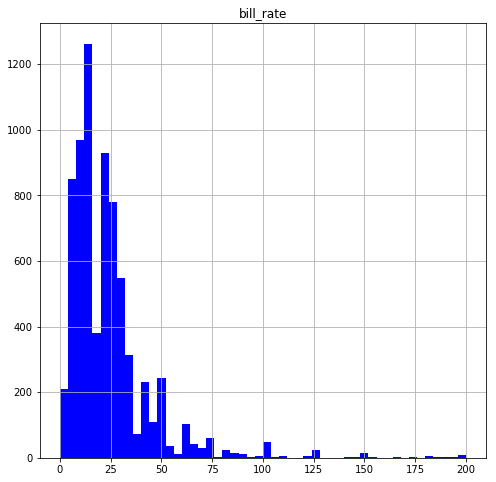

In [143]:
# Plot a histogram of bill rate

merged.hist(column='bill_rate', figsize=(8,8), color="blue", bins=50, range=(0,200))

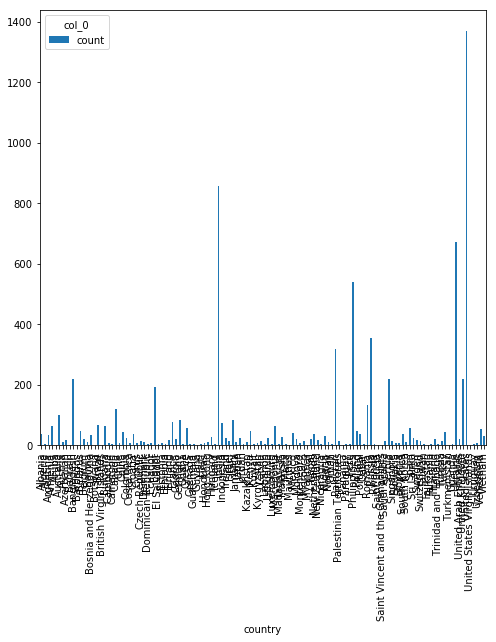

In [144]:
# Plot a bar chart of countries

country_table = pd.crosstab(index=merged['country'], columns="count")
country_table.plot(kind="bar", figsize=(8,8))

In [ ]:
# Plot bill rate by country 

In [52]:
# Run causal analysis 
Y = np.array(bill_rate_array)
D = np.array(gender_array)
X = np.array(all_covariates_array)
causal = CausalModel(Y, D, X)
causal.est_propensity()

print (causal.est_propensity())
    

ValueError: Too few control units: N_c < K+1